<a href="https://colab.research.google.com/github/RuchiraKolekar/Movies-reviews-prediction-using-NLP/blob/main/Movie_revies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('moviereviews.xlsx')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
df.isnull().sum()

label      0
review    62
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [8]:
# removing blank spaces
empty_idx=[]
for indx,label,reviews in df.itertuples():
  if type(reviews)==str:
    if reviews.isspace():
      empty_idx.append(indx)

print(empty_idx)


[]


In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

from nltk.corpus import stopwords
nltk.download("stopwords")

from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
# case conversion and
def clean_text(text):
  token=word_tokenize(text.lower())

  # non alpha removal
  ftoken=[i for i in token if i.isalpha()]

  # stop words removal
  stpw=stopwords.words("english")
  stoken=[i for i in ftoken if i not in stpw]

  # #lemmatization
  lemma=WordNetLemmatizer()
  ltoken=[lemma.lemmatize(i) for i in stoken]

  # joining list of msgs
  return " ".join(ltoken)

In [11]:
df['review']=df['review'].astype(str)

In [12]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [13]:
df['clean_review']=df['review'].apply(clean_text) # assigned a new column as clean_review

In [14]:
df.head()

,label,review,clean_review
0,neg,how do films like mouse hunt get into theatres...,film like mouse hunt get theatre law something...
1,neg,some talented actresses are blessed with a dem...,talented actress blessed demonstrated wide act...
2,pos,this has been an extraordinary year for austra...,extraordinary year australian film shine scoop...
3,pos,according to hollywood movies made in last few...,according hollywood movie made last decade lif...
4,neg,my first press screening of 1998 and already i...,first press screening already gotten prime can...


In [15]:
x=df['clean_review']
x

0       film like mouse hunt get theatre law something...
1       talented actress blessed demonstrated wide act...
2       extraordinary year australian film shine scoop...
3       according hollywood movie made last decade lif...
4       first press screening already gotten prime can...
                              ...                        
1995    like movie albert brook really like movie dire...
1996    might surprise know joel ethan coen brought un...
1997    verdict drama horror maestro stephen king feat...
1998    want correct wrote former retrospective david ...
1999    couple month ago first downloaded trailer net ...
Name: clean_review, Length: 1938, dtype: object

In [16]:
y=df['label']
y

0       neg
1       neg
2       pos
3       pos
4       neg
       ... 
1995    pos
1996    pos
1997    pos
1998    pos
1999    pos
Name: label, Length: 1938, dtype: object

In [17]:
#applying vectorizer to show text in number

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tf=TfidfVectorizer()
x=tf.fit_transform(x).toarray()

In [20]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
x.shape

(1938, 32953)

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         neg       0.81      0.83      0.82       293
         pos       0.82      0.80      0.81       289

    accuracy                           0.82       582
   macro avg       0.82      0.82      0.82       582
weighted avg       0.82      0.82      0.82       582



In [25]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [26]:
def Mymodel(model):
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)
  print(classification_report(ytest,ypred))

In [27]:
gnb=GaussianNB()
Mymodel(gnb)

              precision    recall  f1-score   support

         neg       0.70      0.58      0.63       293
         pos       0.63      0.74      0.68       289

    accuracy                           0.66       582
   macro avg       0.66      0.66      0.66       582
weighted avg       0.67      0.66      0.66       582



In [28]:
mnb=MultinomialNB()
Mymodel(mnb)


              precision    recall  f1-score   support

         neg       0.80      0.83      0.81       293
         pos       0.82      0.79      0.80       289

    accuracy                           0.81       582
   macro avg       0.81      0.81      0.81       582
weighted avg       0.81      0.81      0.81       582



In [29]:
bnb=BernoulliNB()
Mymodel(bnb)

              precision    recall  f1-score   support

         neg       0.71      0.88      0.79       293
         pos       0.84      0.64      0.73       289

    accuracy                           0.76       582
   macro avg       0.78      0.76      0.76       582
weighted avg       0.78      0.76      0.76       582



In [30]:
rev='worst movie ever'

In [31]:
data=clean_text(rev)
data=tf.transform([data]).toarray()

In [32]:
data.shape

(1, 32953)

In [33]:
lr.predict(data)

array(['neg'], dtype=object)

In [34]:
def predict_data(rev):
  data=clean_text(rev)
  data=tf.transform([data]).toarray()
  print('your rev is: ',lr.predict(data)[0])

In [35]:
rev2='best movie'

In [36]:
predict_data(rev2)

your rev is:  neg


In [37]:
from wordcloud import WordCloud


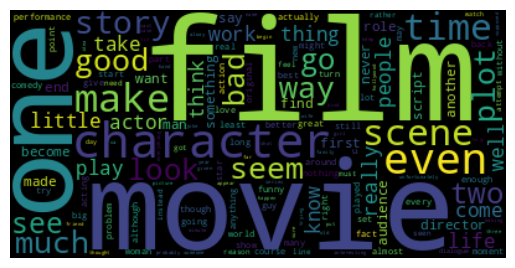

In [38]:
word_cloud = WordCloud()
word_cloud.generate(" ".join((df[df['label']=='neg']["clean_review"])))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()